In [1]:
# Install necessary library
!pip install git+https://github.com/openai/CLIP.git
!pip install torchvision matplotlib

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6yefx0eg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-6yefx0eg
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Using device: cuda


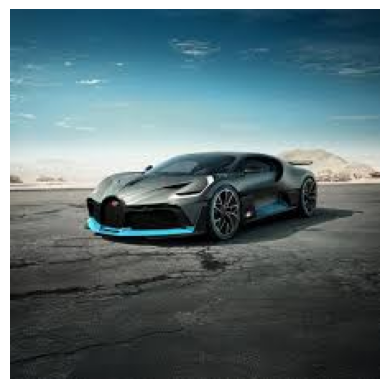

Best match: A car (Confidence: 98.97%)


In [4]:
import torch
import clip
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Install model CLIP
model, preprocess = clip.load("ViT-B/32", device=device)

# Image to test matching with text
# image_url = "https://www.princeton.edu/sites/default/files/styles/1x_full_2x_half_crop/public/images/2022/02/KOA_Nassau_2697x1517.jpg?itok=Bg2K7j7J"  # Ảnh dog
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1pT-PqN4GlsQe67PBX_TqajYj0ecsz08Ncw&s"  # Ảnh Car
# image_url = "https://www.cats.org.uk/media/13139/220325case013.jpg"  # Ảnh cat
# image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTT_GPgYanwd-grjFdLlupZ_zwC8-vmkidfNA&s"  # Ảnh Papa pig
# image_url = "https://media.istockphoto.com/id/1256504181/photo/corgi-puppy-and-a-cute-tabby-cat-stuck-their-muzzles-and-paws-out-of-the-car-window-during-a.jpg?s=612x612&w=0&k=20&c=oNaSv8Izx7rosg0CuzMLR9NifRvp3mG3WgKCetk2aOg="  # Ảnh image mix cat car dog


image = Image.open(requests.get(image_url, stream=True).raw)
plt.imshow(image)
plt.axis("off")
plt.show()

# Preprocessing image
image_input = preprocess(image).unsqueeze(0).to(device)

# List description text
# text_descriptions = ["A car", "A cat", "A dog", "A programming language logo", "A Pig"]
text_descriptions = [
    "A car",
    "A cat",
    "A dog",
    "A cat and a dog",
    "A car with a cat and a dog",
    "A cat, a dog, and a car in one image"
]

text_tokens = clip.tokenize(text_descriptions).to(device)

# Calculate cosine similarity
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_tokens)

    # Normalize vector
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Cosine similarity
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Print result predict
best_match = similarity.argmax().item()
print(f"Best match: {text_descriptions[best_match]} (Confidence: {similarity[0, best_match].item()*100:.2f}%)")
